# This problem contains a simulated data set containing sales of child car seats at 400 different stores. Build a model that predicts  𝚂𝚑𝚎𝚕𝚟𝚎𝙻𝚘𝚌, the shelf location (Bad, Good, or Medium) of the product at each store. 

## 1. Describe the main statistical characteristics of this dataset using the describe() function as well as graphs that support your analysis


            Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price   ShelveLoc         Age   Education       Urban          US  
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000  
mean   115.795000    2.027500   53.322500   13.900000    0.705000    0.645000  
std     23.676664    0.672961   16.200297    2.620528    0.456614    0.479113  
min     24.000000    1.000000   25.000000   10.00

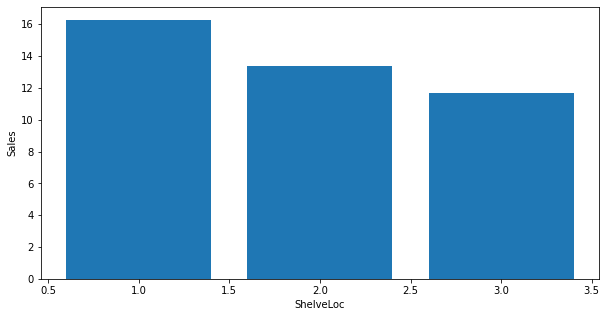

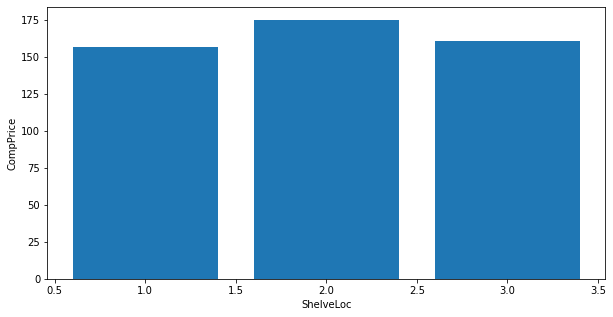

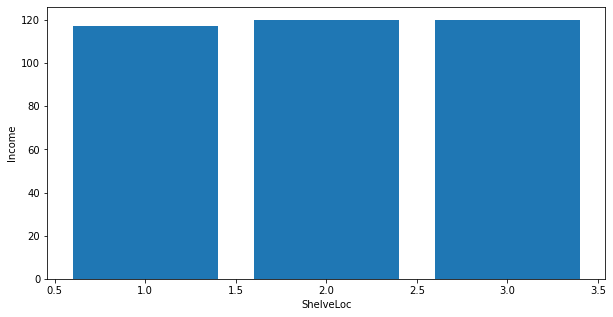

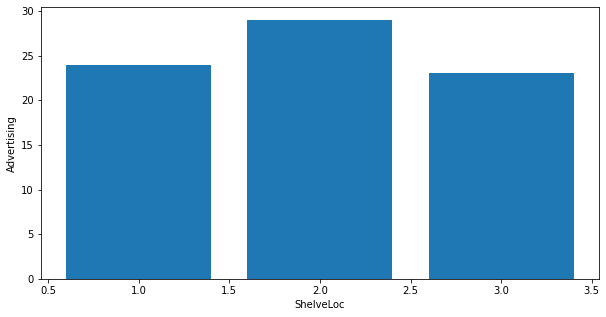

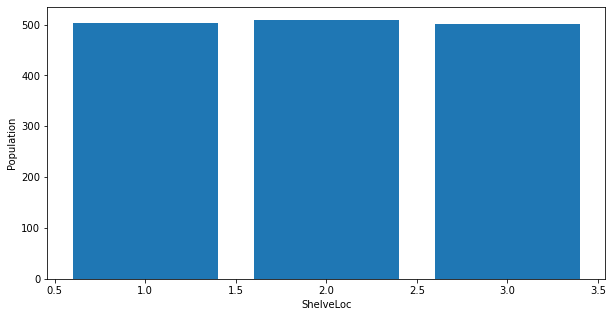

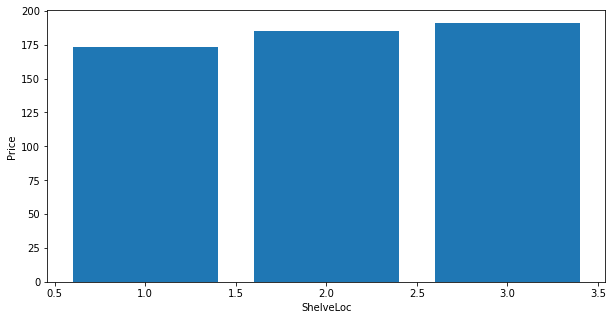

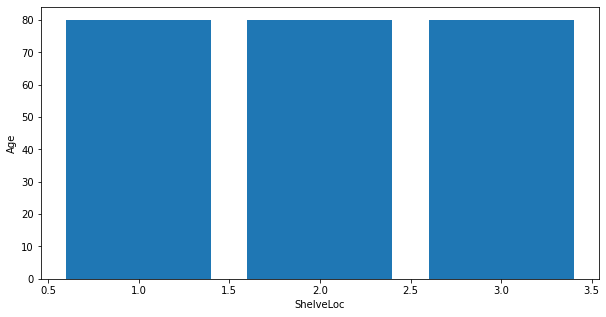

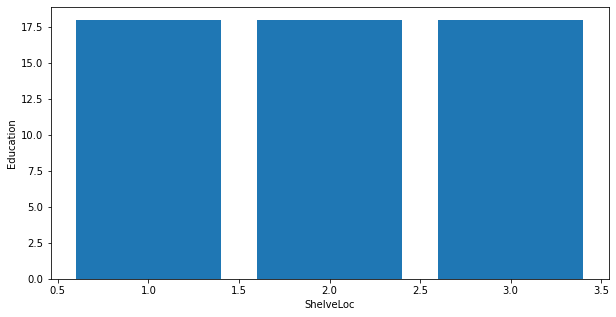

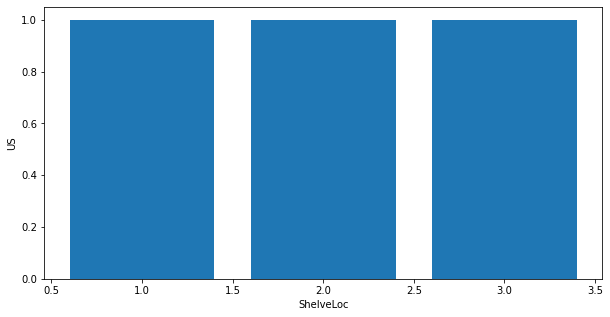

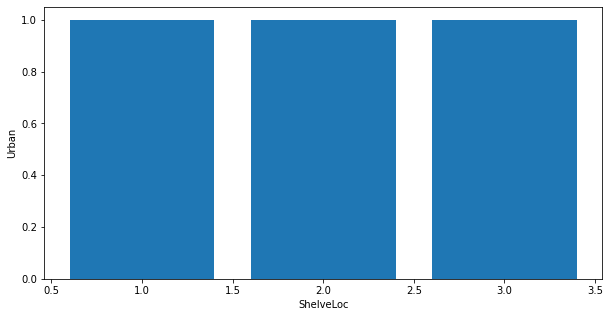

In [70]:
#importing packages
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt
import itertools

import statsmodels.formula.api as smf
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error



#Reading the data in a dataframe
df_car = pd.read_csv('Carseats.csv')

#Replace Urban by 1 and 0
df_car['Urban'].replace(['Yes','No'],[1,0],inplace=True)
df_car['US'].replace(['Yes','No'],[1,0],inplace=True)
df_car['ShelveLoc'].replace(['Good','Medium','Bad'],[1,2,3],inplace=True)

#Descriptive statitics
print(df_car.describe())

#Creating a structure to accomodate subpplots for 8 variables


#Plots for analysis
Plot_ticks = ['Sales','CompPrice','Income','Advertising','Population','Price','Age','Education','US','Urban']
count=0
for i in Plot_ticks:
    fig, axs = plt.subplots(nrows= 1,figsize=(10,5))
    axs.bar(df_car['ShelveLoc'],df_car[i])
    plt.xlabel('ShelveLoc')
    plt.ylabel(i)
    
plt.show()



# From the descriptive analysis, it can be seen that there is a comsiderable variance observed in the variables with poulation having the highest scale of measurement. A majority of products belong to the urban domain and are US based. Population,Age and Education don't seem to contribute much to this classification proces while all marketing parameters like advertizing,sales and prices show a good potential as classifiers. Majority of the shelf locations come under 'Medium' category.

## 2. Spliting the dataset into your training sample (70%) and test sample (30%)


In [71]:
#Splitting data
X = df_car.drop(columns = ['ShelveLoc'])
y = df_car['ShelveLoc']

#Splitting data with 70% training data 
df_car_train ,df_car_test = np.split(df_car,[int(0.7*len(df_car))])

#Creating the training and testing data sets
X_train_3 = df_car_train.drop(columns = ['ShelveLoc'])
y_train_3 = df_car_train['ShelveLoc']
X_test_3 = df_car_test.drop(columns = ['ShelveLoc'])
y_test_3 = df_car_test['ShelveLoc']


## 3. Fitting a logistic regression model using the training sample and another regularized model (shrinking the coefficients) to predict "Shelveloc". Comparing the accuracy of both models using the test sample. 


In [72]:
#Initializing a list for accuracy comparison
model_name_list = []
accuracy_list = []

#Fitting a logistics regression model

#define the multinomial logistic regression model

lr = LogisticRegression()
lr.fit(X_train_3, y_train_3)
lr.predict(X_test_3)

#Calculating the accuracy score
print('Accuracy score for non-regularized model:\n')
print(metrics.accuracy_score(y_test_3, lr.predict(X_test_3)))

#Using regularized model for Logistic regresion

lasso_lr = LogisticRegression(penalty = 'l1',solver = 'liblinear')
lasso_lr.fit(X_train_3,y_train_3)
lasso_lr.predict(X_test_3)
print('Accuracy score for regularized model:\n')
print(metrics.accuracy_score(y_test_3, lasso_lr.predict(X_test_3)))

#Fetching model name and corresponding accuracy
model_name_list.append('Logistic')
model_name_list.append('Regularized Logistic')
accuracy_list.append(metrics.accuracy_score(y_test_3, lr.predict(X_test_3)))
accuracy_list.append(metrics.accuracy_score(y_test_3, lasso_lr.predict(X_test_3)))




Accuracy score for non-regularized model:

0.7083333333333334
Accuracy score for regularized model:

0.7666666666666667


/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## The accuracy in case of regularized models(0.7666666666666667) is greater than non-regularized one(0.7083333333333334). This can be attributed to the fact that regularized models penalizes the co-efficients when output deviates from expected. This lead to higher accuracy for the latter.
## Note: Lasso as a solver was not working as a part of l1 regularization for logistic regression for sklearn 

## 4. Fitting a linear discriminant analysis model using the training sample and another regularized model (shrinking the coefficients) to predict "Shelveloc". Comparing the accuracy of both models using the test sample. 


In [73]:
#Fitting a linear discriminant analysis

lda = LDA()
lda_model = lda.fit(X_train_3, y_train_3)
print(lda_model.priors_)
print(lda_model.means_)
print(lda_model.coef_)
pred1=lda_model.predict(X_test_3)
print(np.unique(pred1, return_counts=True))

#Printing confusion matrix and classification report
print(confusion_matrix(pred1, y_test_3))
print(classification_report(y_test_3, pred1, digits=3))

#Using regularized model for LDA
lda_auto_shrink = LinearDiscriminantAnalysis(solver='lsqr',shrinkage='auto')
lda_auto_shrink .fit(X_train_3,y_train_3)
pred2 = lda_auto_shrink.predict(X_test_3)

#Printing confusion matrix and classification report
print(confusion_matrix(pred2, y_test_3))
print(classification_report(y_test_3, pred2, digits=3))

#Printing accuracy 1
print('Accuracy score for non-regularized model:\n')
print(metrics.accuracy_score(y_test_3,lda_model.predict(X_test_3)))

#Printing accuracy 2
print('Accuracy score for regularized model:\n')
print(metrics.accuracy_score(y_test_3,lda_auto_shrink.predict(X_test_3)))

#Fetching model name and corresponding accurac
model_name_list.append('LDA')
model_name_list.append('Regularized LDA')
accuracy_list.append(metrics.accuracy_score(y_test_3,lda_model.predict(X_test_3)))
accuracy_list.append(metrics.accuracy_score(y_test_3,lda_auto_shrink.predict(X_test_3)))


[0.18928571 0.56785714 0.24285714]
[[ 10.21584906 125.16981132  69.60377358   7.52830189 259.79245283
  118.05660377  53.28301887  13.94339623   0.60377358   0.73584906]
 [  7.14748428 124.54716981  68.63522013   5.47798742 250.28930818
  115.62893082  54.12578616  14.05031447   0.71069182   0.57861635]
 [  5.46147059 123.79411765  73.04411765   5.47058824 280.14705882
  114.33823529  51.45588235  14.           0.70588235   0.61764706]]
[[ 3.11940259e+00 -3.06006858e-01 -5.17798786e-02 -4.01422597e-01
  -1.20511030e-03  3.03867460e-01  1.31758891e-01  9.01747572e-02
  -8.17539866e-01  1.33601726e+00]
 [-1.04881872e-01  1.09120351e-02  5.57536105e-04  1.54428131e-02
  -3.75175908e-04 -1.03034492e-02 -1.50505207e-03 -3.07224223e-03
   1.10440941e-01 -2.09729375e-01]
 [-2.18606059e+00  2.12990440e-01  3.90541960e-02  2.76764564e-01
   1.81652670e-03 -2.12745985e-01 -9.91752639e-02 -6.30996414e-02
   3.78963283e-01 -5.50910943e-01]]
(array([1, 2, 3]), array([28, 64, 28]))
[[25  3  0]
 [ 7 

#Discussion
The accuracy in case of non-regularized models(0.8) is greater than regularized one(0.7166666666666667). This behavior is possible when dimensional reduction achieved is not optimal. The default solver for lda is 'svd' i.e Singular Value Decomposition which does not take into account the covariance calculation. Since least square method is combined with shrinkage, it can cause overfitting. In this case, it can be obversved that precision improved drastically for good and bad categories but overall accuracy dropped since medium was not being predicted precisely. Also,recall for bad category had worsened.
Note: Lasso as a solver was not working as a part of l1 regularization for logistic regression for sklearn 

## 5. Fitting a quadratic discriminant analysis model using the training sample and another regularized model (shrinking the coefficients) to predict "Shelveloc". Comparing the accuracy of both models using the test sample.


[0.18928571 0.56785714 0.24285714]
[[ 10.21584906 125.16981132  69.60377358   7.52830189 259.79245283
  118.05660377  53.28301887  13.94339623   0.60377358   0.73584906]
 [  7.14748428 124.54716981  68.63522013   5.47798742 250.28930818
  115.62893082  54.12578616  14.05031447   0.71069182   0.57861635]
 [  5.46147059 123.79411765  73.04411765   5.47058824 280.14705882
  114.33823529  51.45588235  14.           0.70588235   0.61764706]]
(array([1, 2, 3]), array([29, 61, 30]))
[[26  3  0]
 [ 6 46  9]
 [ 0 11 19]]
              precision    recall  f1-score   support

           1      0.897     0.812     0.852        32
           2      0.754     0.767     0.760        60
           3      0.633     0.679     0.655        28

    accuracy                          0.758       120
   macro avg      0.761     0.753     0.756       120
weighted avg      0.764     0.758     0.760       120



/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:836: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:836: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R *

/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:836: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:836: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R *

/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:836: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:836: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R *

/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:836: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:836: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R *

/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:836: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:836: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R *

/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:836: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:836: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:836: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.su

/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:836: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:836: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R *

/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:836: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:836: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:836: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.su

/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:836: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:836: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R *

/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:836: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:836: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R *

/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:836: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:836: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R *

/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:836: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:836: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R *

/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:836: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:836: RuntimeWarning: invalid value encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/Users/priestleyfernandes/opt/anaconda3/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:833: RuntimeWarning: invalid value encountered in power
  X2 = np.dot(Xm, R *

     index     param
0      0.0  0.758333
1      0.1  0.766667
2      0.2  0.775000
3      0.3  0.766667
4      0.4  0.766667
..     ...       ...
995   99.5  0.266667
996   99.6  0.266667
997   99.7  0.266667
998   99.8  0.266667
999   99.9  0.266667

[1000 rows x 2 columns]
0.2
Accuracy score for non-regularized model:

0.7583333333333333
Accuracy score for regularized model:

0.775


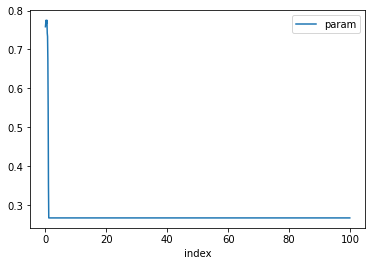

In [74]:
#Fitting a quadratic discriminant analysis

qda = QDA()
qda_model = qda.fit(X_train_3, y_train_3)
print(qda_model.priors_)
print(qda_model.means_)
pred1=qda_model.predict(X_test_3)
print(np.unique(pred1, return_counts=True))

#Printing confusion matrix and classification report
print(confusion_matrix(pred1, y_test_3))
print(classification_report(y_test_3, pred1, digits=3))




#Selecting the appropriate reg param using graph by chceking over a range of reg params
data_plot=[]
for i in np.arange(0,100.0,0.1):

    model_qda = QuadraticDiscriminantAnalysis(reg_param = i)
    model_qda.fit(X_train_3, y_train_3)
    qda_metric = metrics.accuracy_score(y_test_3,model_qda.predict(X_test_3))
    data_plot.append((i,qda_metric))

#Creating a table and then plotting graph
data_pd =pd.DataFrame(data_plot,columns =['index','param'])
print(data_pd)
best_point = data_pd['index'][data_pd['param'].argmax()]

print(best_point)
data_pd.plot(x= 'index',y='param',kind='line')

#Using the optimal value as per graph to fit the model
model_qda = QuadraticDiscriminantAnalysis(reg_param = best_point)
model_qda.fit(X_train_3,y_train_3 )
qda_metric = metrics.accuracy_score(y_test_3,model_qda.predict(X_test_3))

#Printing accuracy
print('Accuracy score for non-regularized model:\n')
print(metrics.accuracy_score(y_test_3,qda_model.predict(X_test_3)))


print('Accuracy score for regularized model:\n')
print(qda_metric)


#Fetching model name and corresponding accuracy
model_name_list.append('QDA')
model_name_list.append('Regularized QDA')
accuracy_list.append(metrics.accuracy_score(y_test_3,qda_model.predict(X_test_3)))
accuracy_list.append(qda_metric)



#Discussion

best reg param

0.2

Accuracy score for non-regularized model:

0.7583333333333333

Accuracy score for regularized model:

0.775

The accuracy of the latter is more since optimal reg param is able to regularize it by reducing the variance associated with it. For higher values of parameter, the efficiency is decreasing as it can be seen from the graph.

## 6.  Fitting a KNN model with K = 1, 2, 3 using the training sample to predict "Shelveloc". Comparing the accuracy of these models using the test sample. Discuss your results.


In [75]:
#Using KNN model for classification with K=1,2 and 3
for i in range(1,4):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    pred = knn.fit(X_train_3, y_train_3).predict(X_test_3)
    
    print(classification_report(y_test_3, pred, digits=3))
    print(metrics.accuracy_score(y_test_3,knn.predict(X_test_3)))
    
    #Fetching model name and corresponding accuracy
    model_name_list.append('KNN K= '+str(i))
    accuracy_list.append(metrics.accuracy_score(y_test_3,knn.predict(X_test_3)))

    

              precision    recall  f1-score   support

           1      0.211     0.125     0.157        32
           2      0.514     0.633     0.567        60
           3      0.185     0.179     0.182        28

    accuracy                          0.392       120
   macro avg      0.303     0.312     0.302       120
weighted avg      0.356     0.392     0.368       120

0.39166666666666666
              precision    recall  f1-score   support

           1      0.258     0.250     0.254        32
           2      0.537     0.733     0.620        60
           3      0.143     0.036     0.057        28

    accuracy                          0.442       120
   macro avg      0.313     0.340     0.310       120
weighted avg      0.370     0.442     0.391       120

0.44166666666666665
              precision    recall  f1-score   support

           1      0.261     0.188     0.218        32
           2      0.549     0.750     0.634        60
           3      0.200     0.107  

#Discussion

As K increases , the accuracy increases.

## 7.Table comparing the accuracy of all the models





In [76]:
#As K increases , the accuracy increases.

#Creating dataframe for model comparison
model_accuracy_df = pd.DataFrame({'Model_name':model_name_list,'Accuracy':accuracy_list})
model_accuracy_df.sort_values('Accuracy',ascending = False)

,Model_name,Accuracy
2,LDA,0.800000
5,Regularized QDA,0.775000
1,Regularized Logistic,0.766667
4,QDA,0.758333
3,Regularized LDA,0.716667
0,Logistic,0.708333
8,KNN K= 3,0.450000
7,KNN K= 2,0.441667
6,KNN K= 1,0.391667


## From the table generated we can see that LDA witout regularization perfroms the best for this dataset with an 0.8 accuaracy followed by QDA with regularization(0.77500) and then regularized logictic regression. The KNN algorithm is not having an accepatble accuarcy compared to other models with accuracies below 0.5. I will emhasize on lda and qda here since they are proving to be good classifiers here. Regularized LDA should have been greater but, LDA assumes that the data is normally distributed. If the condition holds true, LDA without regularizaion performs better than LDA without regularization.Thus,good degree of normalization in the data let to this construct.Similarly, QDA can adapt to a non-linear form of boundary when separating opr classifying data which makes it more accuarate. Logistic regression is a powerful alogrithm for classification. With regularization, it can penalize the values of co-effiecients capabale of deviating from original output.

# Function in Python to calculate the parameters from a linear regression on a data set of $n$ predictors.  Instrayctions (You can assume all the predictors and the prediction is numeric.  Include in the output the standard error of your variables.  You cannot use the function sm.OLS.from_formula() or any of the other built-in regression functions of Python.)

In [77]:
def linear_regression(data,predictor_var,feature_list):
    
    #Fetching number of rows and columns
    m = data.shape[0]
    n = len(feature_list)
    
    #Initializing the weight vector (One added for accoounting for constant)
    theta = np.zeros(n+1)
    
    #Creating the dependent and independent variables
    y = data[predictor_var]
    y_final = np.array(y)
    
    X = data[feature_list]
    X_features = np.array(X)
    
    ones = np.array(pd.DataFrame(np.ones(m)))

    
    #Adding ones which will act as variables for constant
    X_final = np.append(ones,X_features,axis = 1)
   
    #Using the formula for finding the co-efficients of multivariate linear regression model
    theta = np.matmul(np.matmul(np.linalg.inv(np.matmul((X_final.T),X_final)),X_final.T),y_final)
    
    #Predicting the value of y by utilizing the co-efficients found
    y_pred =np.matmul(X_final,theta)
    
    #Finding RSS
    RSS = ((y - y_pred)**2).sum()/m
    SST = ((y-y.mean())**2).sum()
    
    #Finding R-squared value
    R2 = 1 - (RSS/SST)
    print(theta)

    
    return RSS,R2,SST
    

In [78]:
#Function calling
linear_regression(df_sort_date,'ret',['RM-Rf','SMB','HML','RMW','CMA','Lag1','Lag2','Lag3','Lag4','Lag5'])
    
    
    

[-3.43084665e-03  9.88344162e-01 -8.33338399e-03  2.41569360e-02
  1.00816526e-02  6.82581474e-03  1.37047186e-02 -1.15937874e-04
  1.04509399e-02  5.01008867e-03  6.81433139e-03]


(0.011657696800293278, 0.9999945360846532, 2133.5793218342583)

## 2. Comparing the output of function to that of the sm.OLS.from_formula() function.



In [79]:
#OLS linear regression using the inbuilt function
lm = sm.OLS.from_formula('ret ~ ' + '+'.join(df_sort_date.columns.difference(['ret','Date','year','Direction','ret1','ret_sq','RM-Rf'])), df_sort_date)
result = lm.fit()

#Viewing the result
result.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ret   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.802e+04
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:08:00   Log-Likelihood:                 1241.9
No. Observations:                1539   AIC:                            -2462.
Df Residuals:                    1528   BIC:                            -2403.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0034      0.003     -1.231      0.219      -0.009       0.002
CMA            0.0068      0.009      0.785      0.433      -0.010       0.024
HML            0.0242      0.004      5.829      0.000       0.016       0.032
Lag1           0.0137      0.002      5.580      0.000       0.009       0.019
Lag2          -0.0001      0.002     -0.047      0.962      -0.005       0.005
Lag3           0.0105      0.002      4.225      0.000       0.006       0.015
Lag4           0.0050      0.002      2.037      0.042       0.000       0.010
Lag5           0.0068      0.002      2.807      0.005       0.002       0.012
RMRf           0.9883      0.003    389.616      0.000       0.983       0.993
RMW            0.0101      0.007      1.496      0.135      -0.003       0.023
SMB           -0.0083      0.005     -1.819      0.069      -0.017       0.001
==============================================================================
Omnibus:                     2802.910   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5789429.975
Skew:                          12.566   Prob(JB):                         0.00
Kurtosis:                     302.419   Cond. No.                         4.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Discussion As an example, the dependent variable here is ret with few other independent variablesThe output is similar to the one obtained from code used. It follows ordinary least square method where the co-efficients can derived from a matrix formulation based on number of parameters used. The r-suared value comes about 0.9999945360846532 for the answer dertived from function created while it is 0.992 for the sm.OLS.from_formula() function. Even the co-effiecients have very similar values but in random order since the code is not accounting for order of co-efficients. The minor differences observed can be a result of the advanced optimization techniques used as a part of the packages. The major influence as can be seen is due to RM-Rf in this case RSS,R2,SST --> (0.011657696800293278, 0.9999945360846532, 2133.5793218342583)